# <center>Assignment 2</center>
<center>Gaukhar Dauzhan</center>

<i>Include all the required libraries</i>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

The Maclaurin series expansion for function $$f=\frac{1}{1-x}$$ for |x|<1 is
$$\frac{1}{1-x}= 1+x+x^2+x^3+x^4+...$$

We will estimate the function with truncated series and calculate true error depending on the number of terms

<b>a)</b> Function f(x,n, exact) returns the value of series and true error depending on the value x and number of terms in the series

In [2]:
def f(x, n, exact):
    result=0
    error=[]
    for i in range(n):
        result+=x**i
        error.append(abs(result - exact))
    return result, error

<b>b)</b> Function plot(x,max,xlim1,xlim2) plots the graph of dependency of true error on the number of terms in the series. 


In [3]:
def plot(x, exact, xlim1,xlim2):
    error=[]
    _, error = f(x, xlim2+1, exact)
    error = error[xlim1:xlim2]
    num=np.arange(xlim1,xlim2)
    plt.plot(num,error) 
    plt.yscale("log")
    plt.minorticks_on()
    plt.xlabel("Number of terms");
    plt.ylabel("True error");
    plt.title("Dependency of error on the number of terms")
    plt.show()

<b>c)</b> How many terms do we need to have a precision $10^{-15}$? <br/> 

$$Precision = \frac{exactValue - obtainedValue}{exactValue} = \frac{trueError}{exactValue}$$
<br>
Function ```prec(x,exact,maxIter)``` returns the minimal number of terms needed to reach a precision of $10^{-15}$

In [4]:
def prec(x, exact, maxIter): 
    i=1
    prevPrec = -1;
    error=[]
    _, error = f(x, maxIter+1, exact)
    while (i<maxIter) and (error[i-1]/exact>1e-15) and (error[i-1]/exact != prevPrec) :
        prevPrec = error[i-1]/exact
        i+=1
    if error[i-1]/exact<1e-15:
        print(i,"terms required to reach a precision 10^{-15}")
    else:
        print("Precision 10^{-15} cannot be reached. The maximum precision",error[i-1]/exact,"is reached after",i,"terms")

### Steps <b>(a-c)</b> for $x = 0.9$

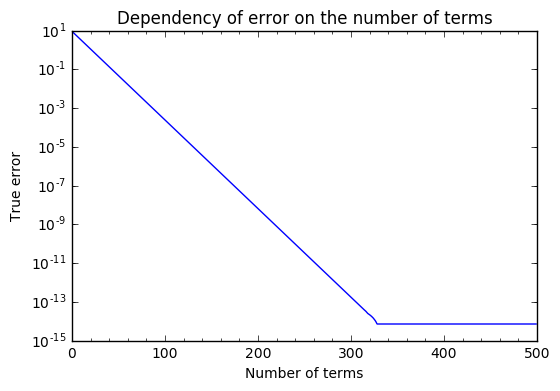

In [5]:
plot(0.9, 10, 0, 500)


Calculation of the number of terms required to reach a precision of $10^{-15}$

In [13]:
prec(0.9, 10, 340)


328 terms required to reach a precision 10^{-15}


### Steps <b>(a-c)</b> for $x = 0.99$

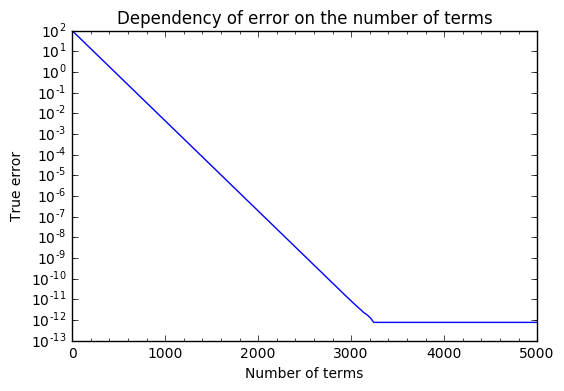

In [7]:
plot(0.99, 100, 0, 5000)

Calculation of the number of terms required to reach a precision of $10^{-15}$

In [8]:
prec(0.99, 100, 3400)

Precision 10^{-15} cannot be reached. The maximum precision 7.531752999057062e-15 is reached after 3243 terms


For $x=0.99$ precision of $10^{-15}$ cannot be reached. We can try to increase precision using numpy.longdouble type

In [9]:
prec(np.longdouble(0.99), 100, 5000)

3656 terms required to reach a precision 10^{-15}


### Steps <b>(a-c)</b> for $x = 0.999$

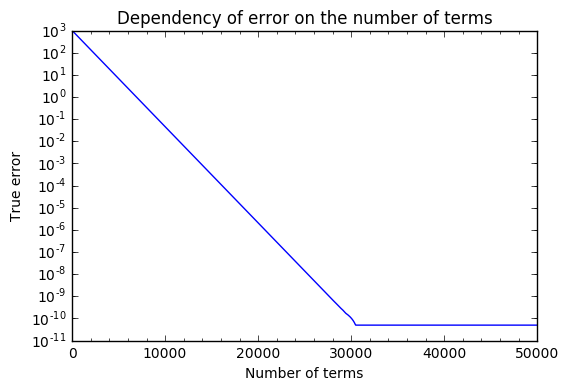

In [10]:
plot(0.999, 1000, 0, 50000)

Calculation of the number of terms required to reach a precision of $10^{-15}$

In [11]:
prec(0.999, 1000, 35000)

Precision 10^{-15} cannot be reached. The maximum precision 4.945377440890297e-14 is reached after 30485 terms


In [12]:
prec(np.longdouble(0.999), 1000, 50000)

36762 terms required to reach a precision 10^{-15}


### Analysis

Use of Taylor series to approximate the exact value of a function leads to the truncation error. As the number of terms increases, truncation error becomes smaller. From the graphs it can be seen that true error is inversely proportional to the number of terms. 

According to the graphs, at some point X true error reaches minimal value and doesn't change as the number of terms increases.  The reason is because of round-off error - floating point variables cannot represent big values, they are just approximations .  However, a better precision can be achieved if we decrease round-off error, i.e. use np.longdouble in this case.
